 <h1><center><b>بسم الله الرحمن الرحيم</b></center></h1>
 
 ---

<center>This case study is part of <a href='https://www.coursera.org/account/accomplishments/professional-cert/ZL5LM69U7EM3'><b>Google data analytics professional certificate</b></a>, exploring the business problem of a hypothetical bike-sharing service in Chicago, <b>Cyclistic</b>. The data used in this case study is sourced from Motivate International Inc under <a href='https://ride.divvybikes.com/data-license-agreement'>this agreement</a>.</center>

## Business Objective

Analyzing the past 12-month data in order to find the difference in bike usage and behavior between **casual users** (*who pays for a single-ride or a full-day service*) and **annual members** (*who pays for a yearly subscription to use the service*).
> The Director of Marketing, Lily Moreno, believes that maximizing the number of annual members will be key to future growth.
>
>Furthermore, she believes that there is very good chance to convert casual users into members instead of creating a marketing campaign that targets all-new customers, as she notes that casual riders are already aware of the Cylistic program.

<center><b>¿What could motivate the “casual” users to change to an annual subscription based on their behavior?</b></center>

## Ask

- More preferable bike-type for both users?
- More preferable weekday for both users?
- Average duration/weekday for both users?
- More preferable seasons for both users?

---

## Prepare

The data used in this case study is a publicly available repository of monthly datasets from Motivate International Inc.

The datasets are available for download <a href='https://divvy-tripdata.s3.amazonaws.com/index.html'>here</a>.

The datasets from the previous 12 months have been downloaded from <a href='https://www.kaggle.com/datasets/evangower/cyclistic-bike-share'>this</a> Kaggle dataset.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all 12-month data (2021 Q2 -> 2022 Q1)
Df_2021_04 = pd.read_csv('Data/202104-divvy-tripdata.csv')
Df_2021_05 = pd.read_csv('Data/202105-divvy-tripdata.csv')
Df_2021_06 = pd.read_csv('Data/202106-divvy-tripdata.csv')
Df_2021_07 = pd.read_csv('Data/202107-divvy-tripdata.csv')
Df_2021_08 = pd.read_csv('Data/202108-divvy-tripdata.csv')
Df_2021_09 = pd.read_csv('Data/202109-divvy-tripdata.csv')
Df_2021_10 = pd.read_csv('Data/202110-divvy-tripdata.csv')
Df_2021_11 = pd.read_csv('Data/202111-divvy-tripdata.csv')
Df_2021_12 = pd.read_csv('Data/202112-divvy-tripdata.csv')
Df_2022_01 = pd.read_csv('Data/202201-divvy-tripdata.csv')
Df_2022_02 = pd.read_csv('Data/202202-divvy-tripdata.csv')
Df_2022_03 = pd.read_csv('Data/202203-divvy-tripdata.csv')

In [3]:
# A list of all months' data
Months_DFs = [Df_2021_04, Df_2021_05, Df_2021_06, Df_2021_07, Df_2021_08, Df_2021_09,
              Df_2021_10, Df_2021_11, Df_2021_12, Df_2022_01, Df_2022_02, Df_2022_03]

# Combining them into one dataset
Cyclistic_df = pd.concat(Months_DFs)

In [4]:
# Quick view on the data (first 5 rows)
Cyclistic_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [5]:
# Infromation about the data
Cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


---

## Process

*Lets start with some cleaning..*

In [6]:
# Fixing data type for date columns
Cyclistic_df['started_at'] = pd.to_datetime(Cyclistic_df['started_at'])
Cyclistic_df['ended_at'] = pd.to_datetime(Cyclistic_df['ended_at'])

In [7]:
# Check If the end date is earlier than start date
false_date = Cyclistic_df.loc[Cyclistic_df['started_at'] > Cyclistic_df['ended_at']]

# (No. of rows with false date, No. of coloumns)
false_date.shape

(145, 13)

In [8]:
# Dropping false date rows
Cdf_clean = Cyclistic_df.drop(false_date.index.to_list())

In [9]:
# Checking duplicates
Cdf_clean.duplicated().sum()

0

In [10]:
# Investigating missing values
Cdf_clean.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745239
start_station_id      745236
end_station_name      796092
end_station_id        796092
start_lat                  0
start_lng                  0
end_lat                 4715
end_lng                 4715
member_casual              0
dtype: int64

In [11]:
# Dropping all rows with missing values
Cdf_dropna = Cdf_clean.dropna()

# (No. of rows after dropping, No. of coloumns)
Cdf_dropna.shape

(4640363, 13)

    When NA dropped, a ~19% of the data is lost, which is a huge bias.
$$
\frac{5.7m (TotalRows) - 4.6m (No.OfRowsAfterDropping)}{5.7m (TotalRows)}\ = 0.19
$$

    Sadly, there is no way to impute missing values correctly, as the data does not exist.
> I decided to continue working with missing data entries as it would be a problem only when analyzing on route level.

*Now, lets derive some features we might use in our analysis..*

In [12]:
# Function to extract season from datetime
def ext_season(month):
    if (month >= 3) and (month <= 5):
        return 'Spring'
    elif (month >= 6) and (month <= 8):
        return 'Summer'
    elif (month >= 9) and (month <= 11):
        return 'Automn'
    else:
        return 'Winter'

In [13]:
# Extracting weekday (Monday = 0, Sunday = 6)
Cdf_clean['weekday'] = Cdf_clean['started_at'].dt.dayofweek

# Calculating trip duration field, in minutes
Cdf_clean['duration_minutes'] = round((Cdf_clean['ended_at'] - Cdf_clean['started_at']).dt.total_seconds() / 60, 2)

# Extracting season
Cdf_clean['season'] = Cdf_clean['started_at'].dt.month.map(ext_season)

In [14]:
# Replace with weekday names instead of numbers
Weekday_Names = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Cdf_clean['weekday'] = Cdf_clean['weekday'].map(Weekday_Names) 

---

## Analyze

In [15]:
#Count the rides; given the user type
C_ut = Cdf_clean['member_casual'].value_counts().rename_axis('member_casual').reset_index(name = 'count')

C_ut

,member_casual,count
0,member,3176284
1,casual,2545997


In [16]:
# Count the rides; given both user, and bike type
C_ut_bt = Cdf_clean.groupby(['member_casual','rideable_type'])['ride_id'].count().rename_axis(['member_casual', 'rideable_type']).reset_index(name = 'count')

C_ut_bt

,member_casual,rideable_type,count
0,casual,classic_bike,1257376
1,casual,docked_bike,303932
2,casual,electric_bike,984689
3,member,classic_bike,1992598
4,member,electric_bike,1183686


In [17]:
# Count the rides; given both user, and weekday
C_wd_ut = Cdf_clean.groupby(['member_casual', 'weekday'])['weekday'].count().rename_axis(['member_casual', 'weekday']).reset_index(name = 'count')

C_wd_ut

,member_casual,weekday,count
0,casual,Friday,364214
1,casual,Monday,292941
2,casual,Saturday,549898
3,casual,Sunday,482692
4,casual,Thursday,293576
5,casual,Tuesday,276313
6,casual,Wednesday,286363
7,member,Friday,453005
8,member,Monday,439351
9,member,Saturday,431255


In [18]:
# Average ride duration; given user, and weekday
Avg_ud_ut = Cdf_clean.groupby(['member_casual', 'weekday'])['duration_minutes'].mean().rename_axis(['member_casual', 'weekday']).reset_index(name = 'avg_duration_m')

# Avg duration rounded to 2 decimal points
Avg_ud_ut['avg_duration_m'] = round(Avg_ud_ut['avg_duration_m'], 2)

Avg_ud_ut

,member_casual,weekday,avg_duration_m
0,casual,Friday,30.10
1,casual,Monday,31.48
2,casual,Saturday,34.28
3,casual,Sunday,37.41
4,casual,Thursday,27.88
5,casual,Tuesday,27.43
6,casual,Wednesday,27.77
7,member,Friday,13.14
8,member,Monday,12.97
9,member,Saturday,14.99


In [19]:
# Count the rides; given both user, and season
C_s_ut = Cdf_clean.groupby(['member_casual', 'season'])['season'].count().rename_axis(['member_casual', 'season']).reset_index(name = 'count')

C_s_ut

,member_casual,season,count
0,casual,Automn,727899
1,casual,Spring,483270
2,casual,Summer,1225185
3,casual,Winter,109643
4,member,Automn,1019056
5,member,Spring,669341
6,member,Summer,1130737
7,member,Winter,357150


---

## Share

In [20]:
def chart_cust(chart):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.set_palette(['#27C7CF', '#7AE1E6'])
    chart
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

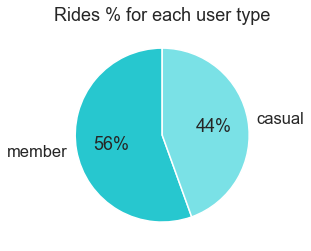

In [26]:
#Count the rides; given the user type
c = plt.pie(C_ut['count'], labels=C_ut['member_casual'], autopct='%.0f%%', startangle=90)
plt.title('Rides % for each user type')
chart_cust(c)

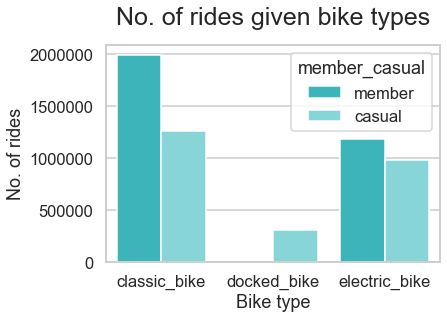

In [22]:
# Count the rides; given both user, and bike type
c = sns.barplot(data=C_ut_bt, x='rideable_type', y='count', hue='member_casual', hue_order=['member', 'casual'])
plt.title('No. of rides given bike types', fontsize=25, pad=20)
plt.xlabel('Bike type')
plt.ylabel('No. of rides')
chart_cust(c)

> Surprisingly, docked bikes are never used by annual members for the past 12-month.

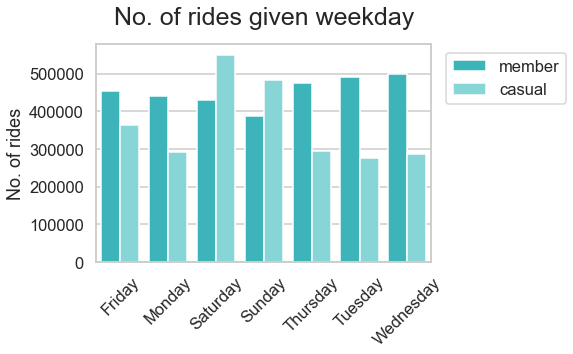

In [23]:
# Count the rides; given both user, and weekday
c = sns.barplot(data=C_wd_ut, x='weekday', y='count', hue='member_casual', hue_order=['member', 'casual'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('No. of rides given weekday', fontsize=25, pad=20)
plt.xlabel('')
plt.ylabel('No. of rides')
chart_cust(c)

> Casual users are active the most during weekends.
>
> Members are more active throughout the rest of the week.

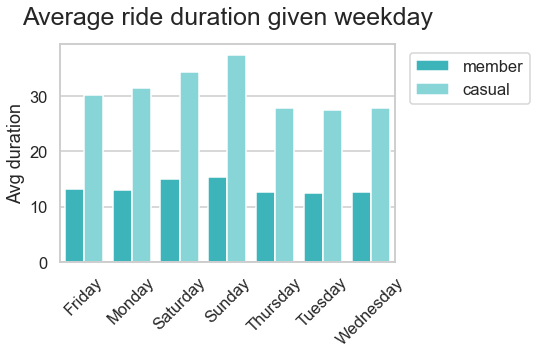

In [24]:
# Average ride duration; given user, and weekday
c = sns.barplot(data=Avg_ud_ut, x='weekday', y='avg_duration_m', hue='member_casual', hue_order=['member', 'casual'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Average ride duration given weekday', fontsize=25, pad=20)
plt.xlabel('')
plt.ylabel('Avg duration')
chart_cust(c)

> Although, average casuals' rides duration go twice the members', over the week.

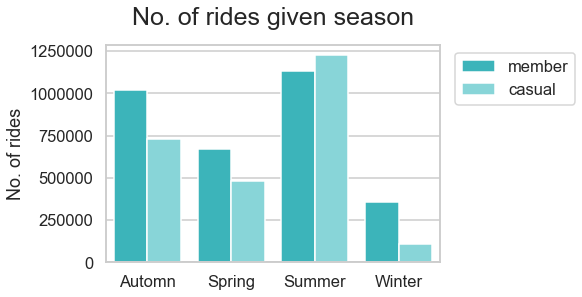

In [25]:
# Count the rides; given both user, and season
c = sns.barplot(data=C_s_ut, x='season', y='count', hue='member_casual', hue_order=['member', 'casual'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('No. of rides given season', fontsize=25, pad=20)
plt.xlabel('')
plt.ylabel('No. of rides')
chart_cust(c)

> Casual users are active the most during summer.
>
> Members are more active than casuals the rest of the year.

---

## Act

***Considering business objective and extracted insights, I suggest:***
- Offering some kind of promotion during summer, or occasionally in weekends.
- Taking docked bikes into annual memberships.

---
<center><b>Thanks for reading ^_^</b><center>
<center><b>Kindly UPVOTE, if you found it useful</b><center>